# Assignment 3

In [1]:
%pylab inline
from PIL import Image
import os
import pandas as pd
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


## Helper Functions

In [2]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg") or file.endswith(".JPG"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

In [3]:
img_dir = os.path.join(os.getcwd(), "images")
images = load_images(img_dir)

In [4]:
X = pd.DataFrame([im.histogram() for im in images])

## Part 1

In [5]:
from sklearn.decomposition import PCA

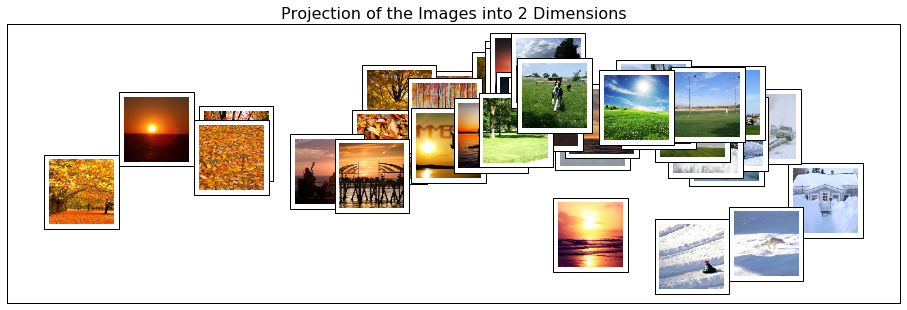

In [6]:
pca = PCA(n_components=2)
pca = pca.fit_transform(X)
plot_image_space(images, pca)

## Part 2

### 1.
If two images are close to together, it means they have very similar color values and when they're normalized their values are close to each other as well. In this case of four different seasons, when two images are close to together they might be in the same season or next or previous one.
If two images are far apart, the situation is the opposite. Their color values must be very different and the gap between each of their normalization value will be large.

### 2.
Images corresponding to one of the seasons do tend to group together more closely than others because they have similar normalization values and their color values are should be close as well

## Part 3

In [7]:
self_img_dir = os.path.join(os.getcwd(), "self-images")
self_images = load_images(self_img_dir)
self_X = pd.DataFrame([im.histogram() for im in self_images])

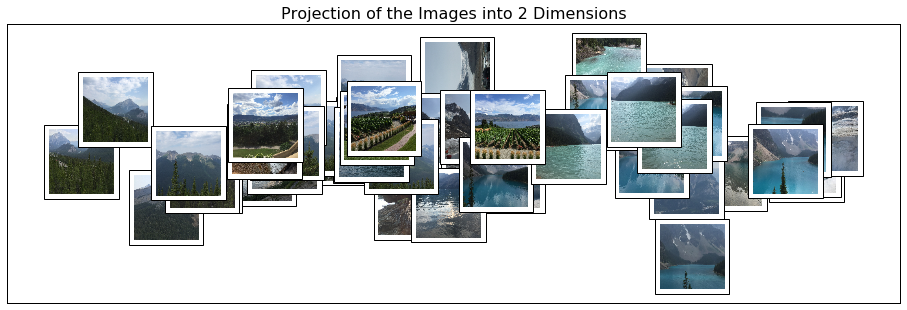

In [8]:
self_pca = PCA(n_components=2)
self_pca = self_pca.fit_transform(self_X)
plot_image_space(self_images, self_pca)